In [60]:
#Importing necessary dependencies
import math
import pathlib
import sys
import matplotlib
import numpy as np
import pandas as pd

import missingno as msno

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import log_loss

In [6]:
# Enable displaying the visualisations in the notebook
%matplotlib inline

In [10]:
# Setting the paths for the  root, train and test dataset
Root_Path = pathlib.Path("/kaggle/input/playground-series-s3e10")
Train_Set = pathlib.Path(Root_Path /"train.csv")
Test_Set = pathlib.Path(Root_Path / "test.csv")

In [11]:
# Reading the test and train dataset

train = pd.read_csv(Train_Set, index_col ="id")
test = pd.read_csv(Test_Set, index_col ="id")

## Datasets exploration for finding useful information

In [15]:
print(f"TrainDataSet - Number of rows {train.shape[0]} and columns {train.shape[1]}")
print(f"TestDataSet - Number of rows {test.shape[0]} and columns {test.shape[1]}")

TrainDataSet - Number of rows 117564 and columns 9
TestDataSet - Number of rows 78377 and columns 8


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 9.0 MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78377 entries, 117564 to 195940
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       78377 non-null  float64
 1   SD                    78377 non-null  float64
 2   EK                    78377 non-null  float64
 3   Skewness              78377 non-null  float64
 4   Mean_DMSNR_Curve      78377 non-null  float64
 5   SD_DMSNR_Curve        78377 non-null  float64
 6   EK_DMSNR_Curve        78377 non-null  float64
 7   Skewness_DMSNR_Curve  78377 non-null  float64
dtypes: float64(8)
memory usage: 5.4 MB


## Random samples from each of the test and train datasets

In [18]:
train.sample(5)

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
101018,104.398438,42.543311,0.594958,1.020899,2.602843,21.229367,8.484040,79.181331,0
23299,114.414062,52.920447,0.273087,-0.197230,3.364548,20.296581,7.859492,69.773978,0
48823,118.945312,45.938581,0.161602,0.163815,0.799331,11.054866,16.156587,297.685937,0
91966,101.703125,44.055423,0.264829,0.402605,3.071906,19.386220,7.513630,65.699374,0
115950,126.492188,44.497069,0.252396,0.120427,1.243311,12.352141,14.152439,239.538878,0


In [19]:
test.sample(5)

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
id,,,,,,,,
152192,136.164062,46.044210,-0.068158,-0.183673,3.084448,19.213185,8.052269,71.512469
119274,134.210938,47.917656,0.056431,-0.078124,1.714883,11.938181,12.004875,203.086178
156343,128.656250,46.305791,0.165797,0.267955,1.836957,13.928417,10.664647,140.928346
163579,91.562500,42.084060,0.531358,1.087704,3.122910,19.078382,8.163731,78.372028
132453,136.406250,46.896901,-0.197186,0.172400,3.074415,17.634329,8.066326,78.339420


## Understaind the basic statistics of the train dataset


In [23]:
train.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


In [24]:
test.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,111.328650,46.729918,0.494829,1.833997,11.857477,26.075380,8.048395,94.034477
std,24.682112,6.088317,1.111206,6.401282,26.610344,19.929691,3.826233,79.905613
min,5.812500,24.772042,-1.788449,-1.791886,0.213211,7.448817,-2.556795,-1.976976
25%,104.585938,43.502110,0.050069,-0.190423,2.088629,14.954451,6.755894,49.704203
50%,116.554688,47.465944,0.185460,0.090628,2.803512,18.164951,8.444376,83.322761
75%,126.195312,50.854073,0.394856,0.692126,4.099498,24.547813,9.973464,122.093290
max,192.617188,91.808628,8.069522,64.117478,223.392141,110.544845,31.471559,1072.793069


# Target column is class in train dataset

## Basic Exploratory Data Analysis


In [27]:
# Checking the missing values in the train datast
print(f"There are {train. isnull().values.any().sum()} missing values in the train dataset")

There are 0 missing values in the train dataset


In [29]:
# Checking the missing values in the test datast
print(f"There are {test. isnull().values.any().sum()} missing values in the test dataset")

There are 0 missing values in the test dataset


## Datasize comparison Train Vs Test

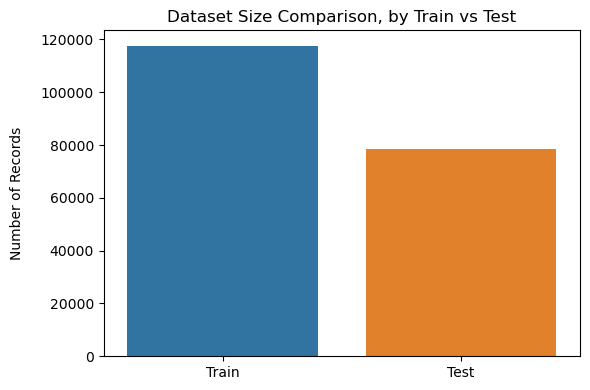

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x=["Train","Test"],y=[train.shape[0],test.shape[0]])
plt.title('Dataset Size Comparison, by Train vs Test', fontsize=12)
plt.ylabel('Number of Records', labelpad=12)
plt.tight_layout()

## Distribution of Class variable in train dataset

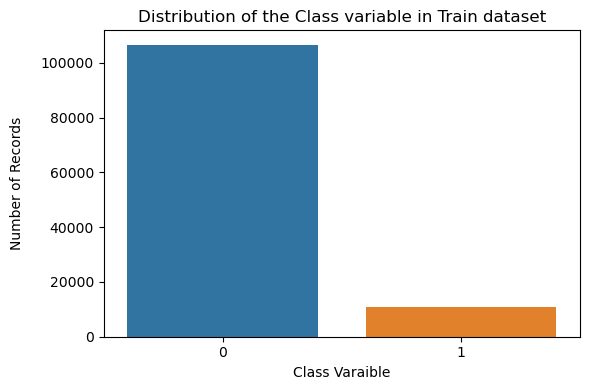

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=train,x="Class",)
plt.title('Distribution of the Class variable in Train dataset', fontsize=12)
plt.ylabel('Number of Records', labelpad=12)
plt.xlabel("Class Varaible")
plt.tight_layout()

In [40]:
# Find the pulsar values in complete dataset

non_pulsar_values = train["Class"].value_counts()[0]
pulsar_values = train["Class"].value_counts()[1]
pert_value = (pulsar_values/non_pulsar_values)*100

print(f"The percentage of pulsar values in the train data is=>{pert_value:.2f}%")

The percentage of pulsar values in the train data is=>10.29%


## Find the correlation among the features in the train dataset

<AxesSubplot:title={'center':'Correlation Between the Features of the Dataset'}>

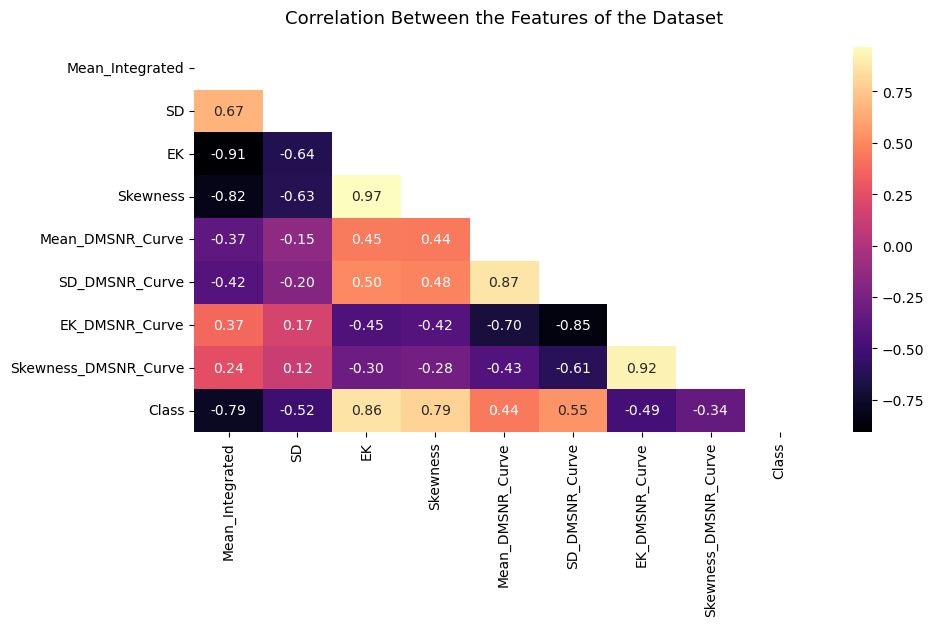

In [43]:
corr = train.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(10,5))

plt.title(
    'Correlation Between the Features of the Dataset',
    fontsize=13,
    y=1.04
)

sns.heatmap(
    corr,
    annot=True,
    cmap='magma',
    mask=mask,
    fmt='.2f'
)

In [44]:
# Check the feature have highest correlation with the Class varaible in dataset
corr["Class"].sort_values(ascending= False)

Class                   1.000000
EK                      0.864005
Skewness                0.793914
SD_DMSNR_Curve          0.547594
Mean_DMSNR_Curve        0.443356
Skewness_DMSNR_Curve   -0.341070
EK_DMSNR_Curve         -0.490247
SD                     -0.523804
Mean_Integrated        -0.788776
Name: Class, dtype: float64

## Modelling time :)

In [46]:
# Dropping the Class varaible before test train and splitting 
X = train.drop("Class", axis = 1)
# Assigning the target value 
y = train["Class"]

In [49]:
# Splitting the 25% of data for test and train
RANDOM_STATE = 50
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size=0.25,random_state=RANDOM_STATE)

## Training model with RandomForestClassifier

In [53]:
modelling = RandomForestClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

In [54]:
# Fitting the model
modelling.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished


RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       n_jobs=-1, random_state=50, verbose=1)

In [56]:
# Find the log loss of the model
log_loss = log_loss(valid_y, modelling.predict_proba(valid_X))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [58]:
print(f"The log loss of the RandomForestClassifier is {log_loss:.2f}")

The log loss of the RandomForestClassifier is 0.04


## Traning Model with  AdaBoostClassifier

In [67]:
model = AdaBoostClassifier(random_state=RANDOM_STATE)

In [68]:
# Fitting the model
model.fit(train_X,train_y)

AdaBoostClassifier(random_state=50)

## Preparing for the submission

In [71]:
submission = pd.DataFrame({
    'id': test.index,
    'Class': modelling.predict_proba(test)[:,1]
})

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [72]:
# Saving the file to csv
submission.to_csv('submissions.csv', index=False)